In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Covid Data Reading And Visualizing

In [ ]:
covid_data_s2g6 = pd.read_csv('gdrive/My Drive/covid_dataset.csv')
covid_data_s2g6.head(5)

,Day,Lab Test,Confirmed case,Death Case
0,2020-April-04,434,9,2
1,2020-April-05,367,18,1
2,2020-April-06,468,35,3
3,2020-April-07,679,41,5
4,2020-April-08,981,54,3


In [ ]:
covid_data_s2g6['Day'] = pd.to_datetime(covid_data_s2g6['Day'], format='%Y-%B-%d')
covid_data_s2g6.head(5)

,Day,Lab Test,Confirmed case,Death Case
0,2020-04-04,434,9,2
1,2020-04-05,367,18,1
2,2020-04-06,468,35,3
3,2020-04-07,679,41,5
4,2020-04-08,981,54,3


In [ ]:
covid_data_s2g6.describe()

,Lab Test,Confirmed case,Death Case
count,626.000000,626.000000,626.000000
mean,18033.835463,2526.009585,44.798722
std,9357.619008,2936.765446,54.528270
min,367.000000,9.000000,0.000000
25%,12869.500000,657.750000,14.000000
50%,15557.000000,1637.000000,30.000000
75%,20982.750000,2953.500000,44.000000
max,55284.000000,16230.000000,264.000000


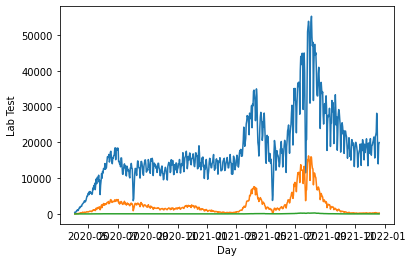

In [ ]:
sb.lineplot(x="Day", y="Lab Test", data=covid_data_s2g6)
sb.lineplot(x="Day", y="Confirmed case", data=covid_data_s2g6)
sb.lineplot(x="Day", y="Death Case", data=covid_data_s2g6)
plt.show()

# FirstDose Data Reading And Visualization

In [ ]:
covid_first_dose_s2g6 = pd.read_csv('gdrive/My Drive/covid_first_dose.csv')
covid_first_dose_s2g6.head(5)

,Day,Number of Vaccinations (First Dose)
0,1/27/2021,26
1,1/28/2021,541
2,2/7/2021,31160
3,2/8/2021,46509
4,2/9/2021,101082


In [ ]:
covid_first_dose_s2g6['Day'] = pd.to_datetime(covid_first_dose_s2g6['Day'], format='%Y-%m-%d')
covid_first_dose_s2g6.head(5)

,Day,Number of Vaccinations (First Dose)
0,2021-01-27,26.0
1,2021-01-28,541.0
2,2021-02-07,31160.0
3,2021-02-08,46509.0
4,2021-02-09,101082.0


In [ ]:
covid_first_dose_s2g6.describe()

,Number of Vaccinations (First Dose)
count,2.390000e+02
mean,2.873681e+05
std,5.407586e+05
min,2.000000e+00
25%,3.550150e+04
50%,2.050900e+05
75%,3.202935e+05
max,6.625123e+06


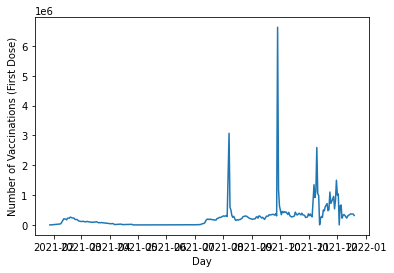

In [ ]:
sb.lineplot(x="Day", y="Number of Vaccinations (First Dose)", data=covid_first_dose_s2g6)

plt.show()

# Merge Covid Data and First dose

In [ ]:
dfmerge = dfcov.merge(dffirst, on= 'Day')

In [ ]:
dfmerge

,Day,Lab Test,Confirmed case,Death Case,Number of Vaccinations (First Dose)
0,2021-01-27,15720,528,17,26.0
1,2021-01-28,14830,509,15,541.0
2,2021-02-07,12404,292,15,31160.0
3,2021-02-08,13762,316,16,46509.0
4,2021-02-09,14468,387,8,101082.0
...,...,...,...,...,...
234,2021-12-13,22037,385,3,325250.0
235,2021-12-14,22870,295,3,338574.0
236,2021-12-15,28153,297,4,367004.0
237,2021-12-18,13991,122,4,363539.0


# Anti Join

In [ ]:
dfnovac = dfcov[~dfcov['Day'].isin(dfmerge['Day'])]

In [ ]:
dfnovac

,Day,Lab Test,Confirmed case,Death Case
0,2020-04-04,434,9,2
1,2020-04-05,367,18,1
2,2020-04-06,468,35,3
3,2020-04-07,679,41,5
4,2020-04-08,981,54,3
...,...,...,...,...
601,2021-11-26,16916,239,3
615,2021-12-10,20052,269,1
621,2021-12-16,25203,257,3
622,2021-12-17,16310,191,2


In [ ]:
fday = dffirst['Day'].iloc[0]
fday

Timestamp('2021-01-27 00:00:00')

In [ ]:
dfnovac = dfnovac[dfnovac['Day'] < fday]
dfnovac

,Day,Lab Test,Confirmed case,Death Case
0,2020-04-04,434,9,2
1,2020-04-05,367,18,1
2,2020-04-06,468,35,3
3,2020-04-07,679,41,5
4,2020-04-08,981,54,3
...,...,...,...,...
293,2021-01-22,14846,619,15
294,2021-01-23,11115,436,22
295,2021-01-24,14169,473,20
296,2021-01-25,14829,602,18


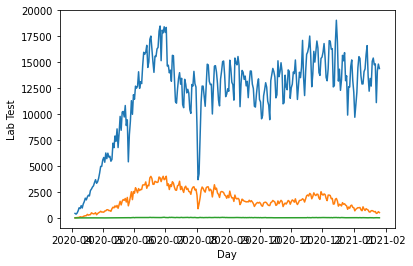

In [ ]:
sb.lineplot(x="Day", y="Lab Test", data=dfnovac)
sb.lineplot(x="Day", y="Confirmed case", data=dfnovac)
sb.lineplot(x="Day", y="Death Case", data=dfnovac)
plt.show()

# Final Dataset 

In [ ]:
data = dfnovac.drop(['Day'],axis=1)
data

,Lab Test,Confirmed case,Death Case
0,434,9,2
1,367,18,1
2,468,35,3
3,679,41,5
4,981,54,3
...,...,...,...
293,14846,619,15
294,11115,436,22
295,14169,473,20
296,14829,602,18


In [ ]:
features = data.columns

In [ ]:
features = [x for x in features if x != 'Death Case']

# Train Test Split

In [ ]:
train, test = train_test_split(data, test_size = 0.2)

In [ ]:
print(len(data))
print(len(train))
print(len(test))

298
238
60


In [ ]:
x_train = train[features]
y_train = train["Death Case"]

x_test = test[features]
y_test = test["Death Case"]

In [ ]:
x_train=np.asarray(x_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
x_test=np.asarray(x_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)

# NN

In [ ]:
model = Sequential()
#input layer
model.add(Dense(32, activation = 'relu', input_dim = 2))

# 1st hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# 2nd hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# 3rd hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# 4th hidden layer
#model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 47488.8320
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 4174.7974
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 406.5207
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 86.7999
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 71.0668
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 69.0506
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 67.9531
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 70.8109
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 83.5403
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 72.1347
Epoch 11/100
24/24 [==============================] - 0s 2ms/step - loss: 82.4631
Epoch 12/100
24/24 [==============================] - 0s 2ms/step - loss: 63.8203
Epoch 13/100
24/24 

In [ ]:
y_pred = model.predict(x_test)

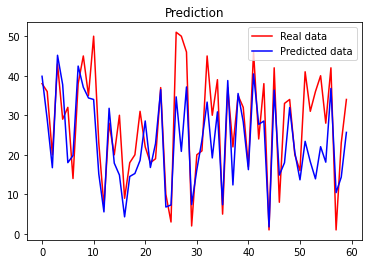

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,38,39.862156
1,36,28.953665
2,20,16.733801
3,43,45.175037
4,29,37.726887
5,32,18.015600
6,14,19.819799
7,38,42.441578
8,45,37.080418
9,35,34.376926


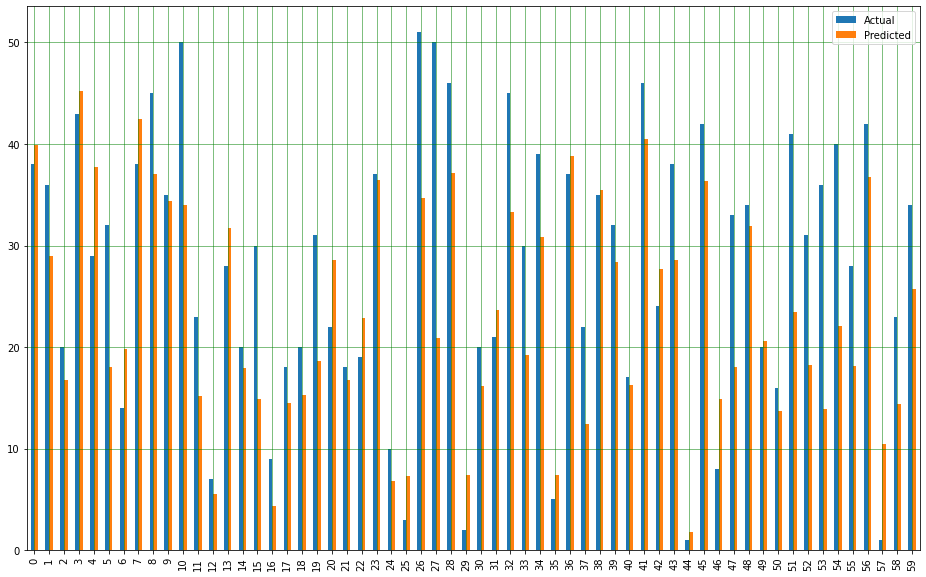

In [ ]:
result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
print("Mean abosolute error is ", round(score, 3))

Mean abosolute error is  7.1


In [ ]:
from sklearn.metrics import max_error
score = max_error(y_test, y_pred)
print("Max error is ", round(score, 3))

Max error is  29.1


In [ ]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, y_pred)
print("Mean squared error is ", round(score, 3))

Mean squared error is  84.839


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2 Score is ", round(score, 3))

NameError: ignored

In [ ]:
test_data = dfmerge[dfmerge['Day'] == dffirst['Day'].iloc[28]]

In [ ]:
test_data

,Day,Lab Test,Confirmed case,Death Case,Number of Vaccinations (First Dose)
28,2021-03-10,17032,1018,7,104990.0


In [ ]:
y_pred = model.predict([[17032,1018]])

In [ ]:
y_pred

array([[29.979223]], dtype=float32)

# SVM

In [ ]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'poly', degree=2) 
regressor.fit(x_train, y_train)

SVR(degree=2, kernel='poly')

In [ ]:
y_pred = regressor.predict(x_test) 

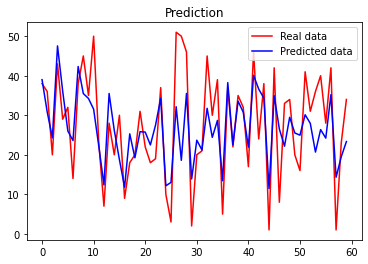

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,38,39.009779
1,36,30.836302
2,20,24.298234
3,43,47.547359
4,29,36.119158
5,32,26.024497
6,14,23.594930
7,38,42.334054
8,45,35.488053
9,35,34.253685


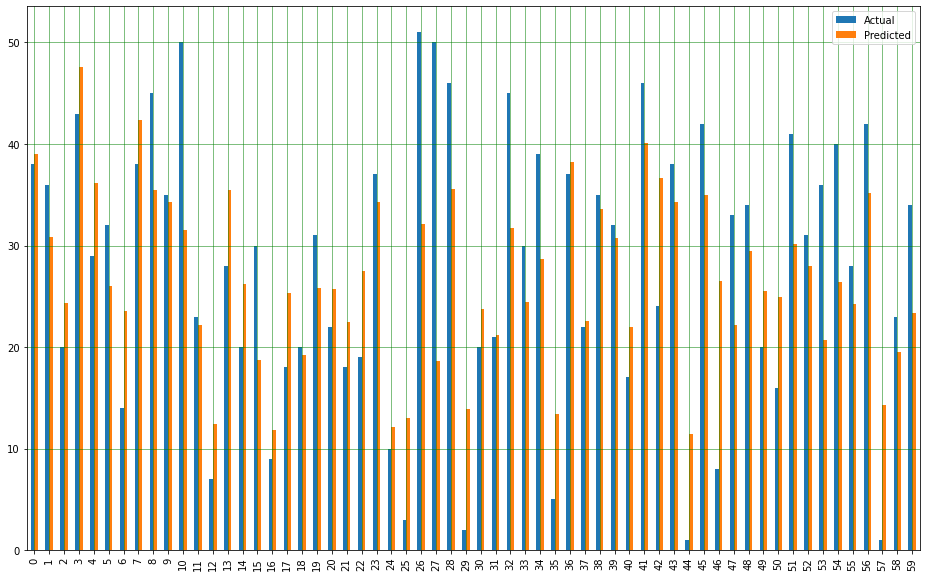

In [ ]:
result.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() 

In [ ]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
print("Mean abosolute error is ", round(score, 1))

Mean abosolute error is  7.4


In [ ]:
from sklearn.metrics import max_error
score = max_error(y_test, y_pred)
print("Max error is ", round(score, 3))

Max error is  31.397


In [ ]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, y_pred)
print("Mean squared error is ", round(score, 3))

Mean squared error is  85.72


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R2 Score is ", round(score, 3))

R2 Score is  0.518


In [ ]:
y_pred = regressor.predict([[11148,350]])

In [ ]:
y_pred

array([18.94148394])